In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [2]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [5]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [19]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


([<matplotlib.patches.Wedge at 0x7fdd3ad3aab0>,
 [Text(-0.6568643701797422, -0.8823430167391653, '0'),
  Text(0.6568640826758595, 0.8823432307726976, '1')],
 [Text(-0.3582896564616775, -0.4812780091304537, '79.6%'),
  Text(0.3582894996413779, 0.4812781258760168, '20.4%')])

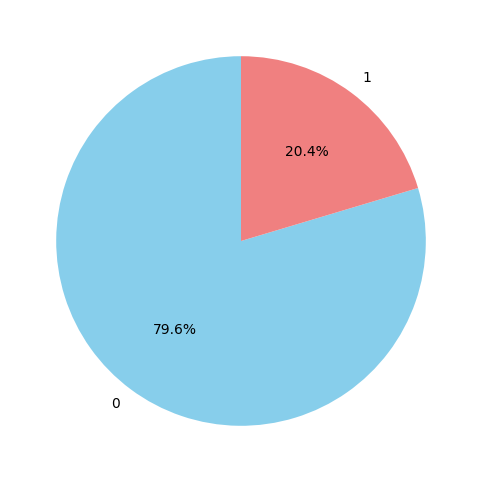

In [6]:
counts=df['Exited'].value_counts()
labels = counts.index
colors = ['skyblue', 'lightcoral']
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)

In [7]:
df.shape

(10000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# **SMOTE**

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
x = df.drop('Exited', axis=1)
y = df['Exited']


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [12]:
categorical_cols = ['Geography', 'Gender']

numeric_cols = X_train.columns.difference(categorical_cols)

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

In [14]:
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42))
])

In [15]:
X_train_smote, y_train_smote = pipeline.fit_resample(X_train, y_train)

print("After SMOTE:\n", y_train_smote.value_counts())

After SMOTE:
 Exited
1    6370
0    6370
Name: count, dtype: int64


In [16]:
df.shape

(10000, 11)

In [20]:
X_train_smote.shape

(12740, 13)

In [21]:
!git --version


git version 2.34.1


In [22]:
!git config --global user.name "Kiran771"
!git config --global user.email "kiransaud51@gmail.com"


In [23]:
!git clone https://github.com/Kiran771/AI_churn_prediction.git



Cloning into 'AI_churn_prediction'...
